In [1]:
from sklearn import datasets
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import random

In [2]:
def distance(p1, p2):
    '''
    Find the distance between points 
    p1 and p2
    '''
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

def magority_vote(votes):
    '''
    Finds the winner. If there is a tie among winners, the 
    program choose radomly
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)

def find_nearest_neighbors(p, points, k = 5):
    '''
    Find the k nearest neighbors of point p and return their indices.
    '''
    distances = np.zeros(points.shape[0])
    #loop over all points
    for i in range(len(distances)):
        #compute the distance beetween point p and every other point
        distances[i] = distance(p, points[i])
    #sort distances and return those k points that are the nearest to point p
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k = 5):
    #find the k nearest neighbors
    ind = find_nearest_neighbors(p, points)
    #predict the class of p based on the majority votes
    return magority_vote(outcomes[ind])

def generate_syth_data(n = 50):
    '''
    Create two sets of points from bivariate normal distribution.
    '''
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis = 0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)

def make_prediction_grid(predictors, outcomes,limits, h, k):
    '''
    Classify each point on the pridiction grid.
    '''
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)

    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [3]:
iris = datasets.load_iris()

In [4]:
iris['data']

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [5]:
predictors = iris.data[:, 0:2] #we want all rows and columns 0 and 1
outcomes = iris.target
outcomes.shape

(150,)

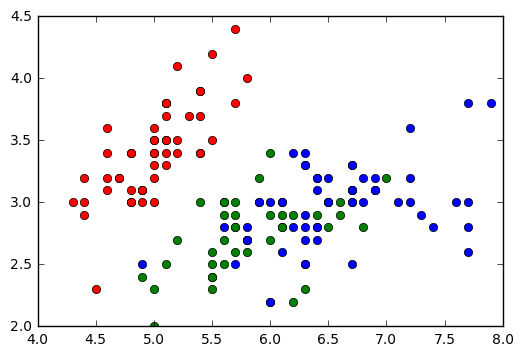

In [6]:
#x coordinates = all rows column 0 , y coordinates = all rows column 1
#3 species, 3 outcomes
plt.plot(predictors[outcomes == 0] [:,0], predictors[outcomes == 0] [:,1], 'ro')
plt.plot(predictors[outcomes == 1] [:,0], predictors[outcomes == 1] [:,1], 'go')
plt.plot(predictors[outcomes == 2] [:,0], predictors[outcomes == 2] [:,1], 'bo')
plt.savefig('irish.pdf')

plt.show()

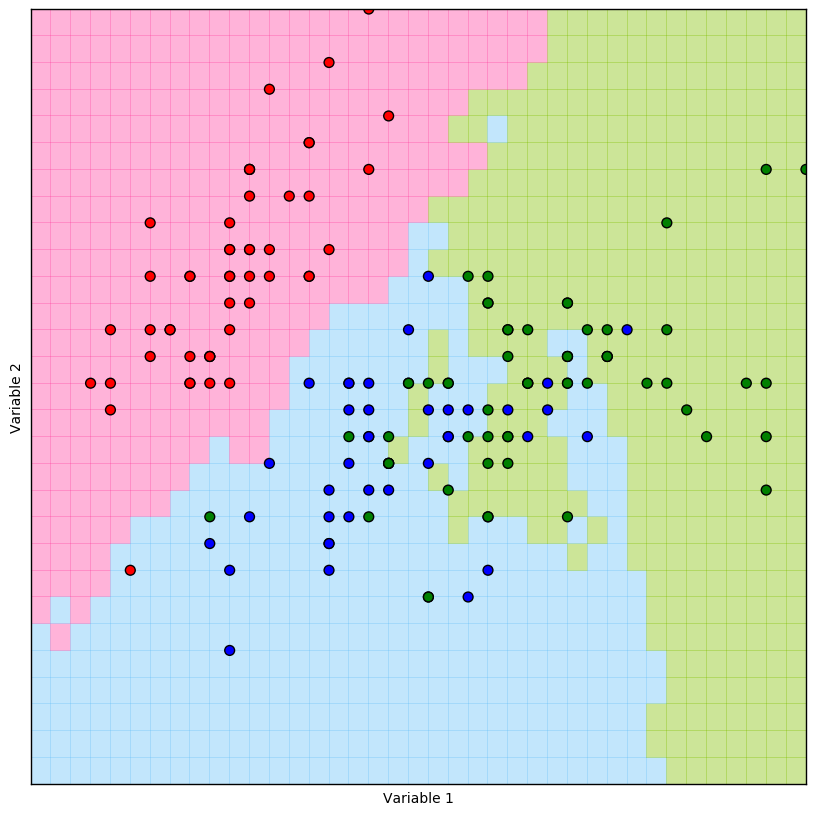

In [7]:
k = 5; filename = 'irish_grid.pdf'; limits = (4, 8, 1.5, 4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [10]:
sk_predictions.shape

(150,)

In [11]:
sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [13]:
my_predictions.shape

(150,)

In [14]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [15]:
np.mean(sk_predictions == my_predictions)

0.95999999999999996

In [16]:
100 * np.mean(sk_predictions == my_predictions)

96.0

In [17]:
100 * np.mean(sk_predictions == outcomes)

83.333333333333343

In [18]:
100 * np.mean(my_predictions == outcomes)

84.666666666666671

#### Q1: Applying the kNN Method

What are the four variables in the iris dataset described in Video 3.3.8?

1. Sepal length, sepal width, iris length, iris width
2. **Sepal length, sepal width, petal length, petal width**
3. Stamen length, stamen width, iris length, iris width
4. Stamen length, stamen width, petal length, petal width

#### Q2: Applying the kNN Method

How many different species are contained in the iris dataset described in Video 3.3.8?

1. **3**
2. 4
3. 5
4. 6

#### Q3: Applying the kNN Method

How often do the predictions from the homemade and scikit-learn kNN classifiers accurately predict the class of the data in the iris dataset described in Video 3.3.8?

1. Approximately 65% of the time
2. Approximately 75% of the time
3. **Approximately 85% of the time**
4. Approximately 95% of the time